# Petrol consumption prediction

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_column',None)

In [170]:
df=pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


## Exploratory Data Analysis

In [172]:
df.describe(percentiles=(0.01,0.1,0.25,0.5,0.75,0.9,0.99)).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,5.47000,7.0000,7.00000,7.5000,8.12500,9.000,9.53000,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3189.90000,3558.1000,3739.00000,4298.0000,4578.75000,5039.200,5331.19000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,511.37000,1859.0000,3110.25000,4735.5000,7156.00000,9280.900,16091.88000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.46792,0.5124,0.52975,0.5645,0.59525,0.663,0.70191,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,375.02000,462.8000,509.50000,568.5000,632.75000,700.500,919.59000,968.000


### Distribution plots

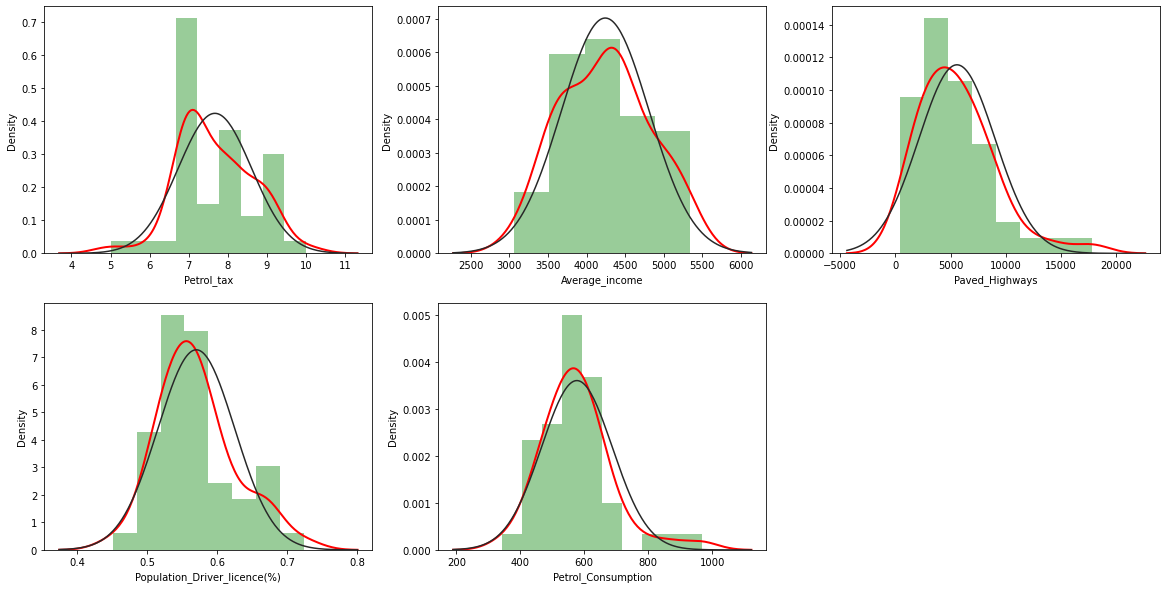

In [173]:
from scipy.stats import norm
plt.figure(figsize=(20,10))
for i,var in enumerate(df.columns,1):
    plt.subplot(2,3,i)
    sns.distplot(df[var],color='g',kde_kws={"color": "r", "lw": 2, "label": "KDE"},fit=norm)

### Heat map of correlation coefficients

<AxesSubplot:>

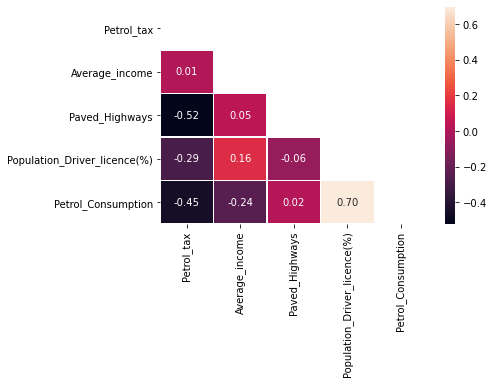

In [174]:
sns.heatmap(df.corr(),linewidths=0.3,annot=True,fmt='0.2F',mask=np.triu(df.corr()))

### Pairplots

<Figure size 1440x1440 with 0 Axes>

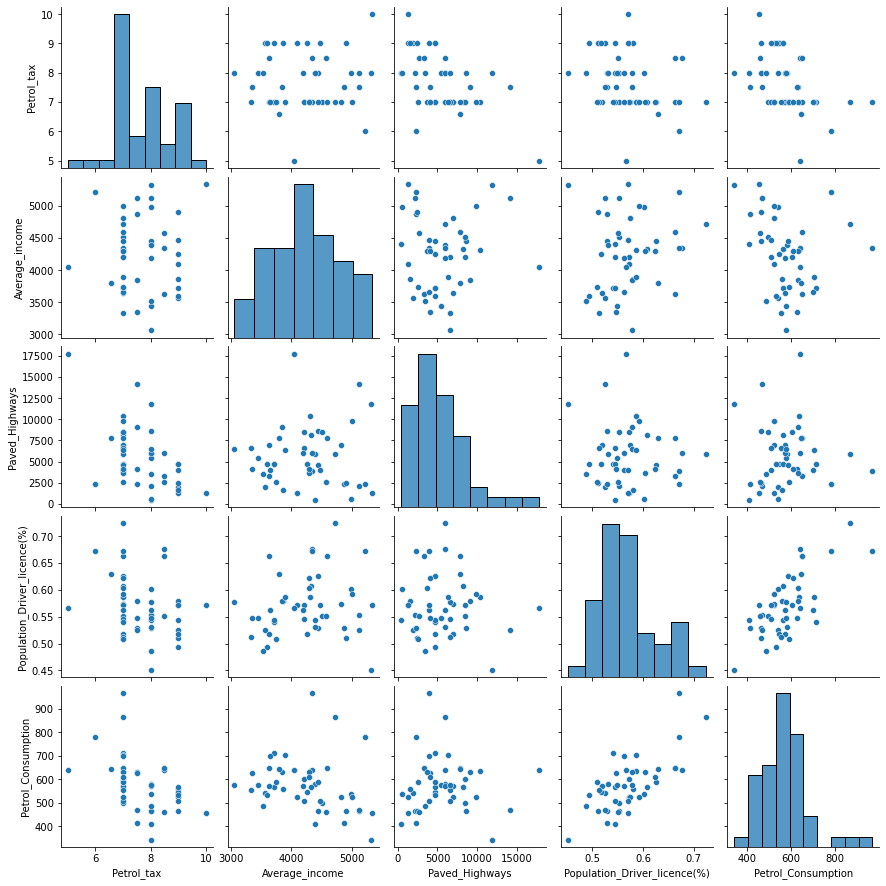

In [175]:
plt.figure(figsize=(20,20))
sns.pairplot(df)

### Seperating Independent and target variables

In [176]:
X=df.drop(['Petrol_Consumption'],axis=1)
y=df['Petrol_Consumption']

### Standardization

In [177]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_sc=pd.DataFrame(scaler.fit_transform(X),index=X.index,columns=X.columns)
X_sc.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,1.415441,-1.181841,-1.038921,-0.825903
1,1.415441,-0.263969,-1.249055,0.030364
2,1.415441,-0.663887,-1.151803,0.176112
3,-0.178923,1.106673,-0.930381,-0.753029
4,0.352532,0.276889,-1.486106,-0.479753


### Train test split of dataset

In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.2,random_state=4)

## Model Building - Oridinary Least Sqaure (OLS)

### Adding constants to independent variables

In [179]:
import statsmodels.api as sm
X_endog=sm.add_constant(X_train)
X_endog1=sm.add_constant(X_test)
model=sm.OLS(y_train,X_endog)
model.fit()

### Summary of the model

In [180]:
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     11.28
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           7.06e-06
Time:                        08:48:27   Log-Likelihood:                -210.99
No. Observations:                  38   AIC:                             432.0
Df Residuals:                      33   BIC:                             440.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          576.2780     11.253     51.210      0.000     553.383     599.173
Petrol_tax                     -36.4463     14.646     -2.488      0.018     -66.244      -6.648
Average_income                 -40.2598     13.165     -3.058      0.004     -67.045     -13.474
Paved_Highways                 -15.8851     15.847     -1.002      0.323     -48.126      16.356
Population_Driver_licence(%)    61.3619     12.989      4.724      0.000      34.936      87.788
==============================================================================
Omnibus:                       26.125   Durbin-Watson:                   2.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.038
Skew:                           1.708   Prob(JB):                     1.84e-12
Kurtosis:                       7.739   Cond. No.                         2.37
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***
- In correlation it is observed that Petrol_tax and AVerage_income are negatively correlated but Average_income and Paved_Highway are positively correlated.
- From summary table it is observed that Paved_Highways coeffiecient sign is reversed which is clear indication of multicollinearity problem.
***

***
- In Hypothesis test in statsmodel, null hypothesis states that the coefficient of independent features are zero.
- Here in summary data it is observed that in t-test p-value of Paved_Highways is 0.323 which is greater than critical value if 95% confidence interval is considered.
- Hence for perticularly Paved_Highways feature it is failed to reject the null which intern indicates that it has zero coefficient value.
- Other features are p-value is less than that of critical value hence those feature would reject the null.
***

***
- So based on these observations Paved_Highways feature is dropped from independent variables.
***

### Evaluation function

In [181]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [182]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def print_result(model,X_endog,X_endog1,y_train,y_test):
    y_pred=model.fit().predict(X_endog)
    print('===========================================================================')
    print('Train data evaluation:')
    print('===========================================================================')
    print('Mean Squared Error:',mean_squared_error(y_train,y_pred))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_train,y_pred)))
    print('Mean Absolute Error:',mean_absolute_error(y_train,y_pred))
    print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_train,y_pred))
    
    print('\n===========================================================================')
    print('Test data evaluation:')
    print('===========================================================================')
    y_pred=model.fit().predict(X_endog1)
    print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
    print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
    print('Mean Absolute Percentage Error:',mean_absolute_percentage_error(y_test,y_pred))

### Evaluation

In [183]:
print_result(model,X_endog,X_endog1,y_train,y_test)

Train data evaluation:
Mean Squared Error: 3892.223275473903
Root Mean Squared Error: 62.387685287033236
Mean Absolute Error: 45.26467251832301
Mean Absolute Percentage Error: 7.578365948408197

Test data evaluation:
Mean Squared Error: 4908.165513605801
Root Mean Squared Error: 70.0583008187167
Mean Absolute Error: 57.306515687572826
Mean Absolute Percentage Error: 10.460318112118141


### Dropping feature

In [184]:
X_endog.drop(['Paved_Highways'],axis=1,inplace=True)
X_endog1.drop(['Paved_Highways'],axis=1,inplace=True)

### Rebuilding model 

In [185]:
model=sm.OLS(y_train,X_endog)
model.fit()
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Petrol_Consumption   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     14.70
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           2.65e-06
Time:                        08:48:28   Log-Likelihood:                -211.56
No. Observations:                  38   AIC:                             431.1
Df Residuals:                      34   BIC:                             437.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          576.8255     11.241     51.316      0.000     553.982     599.669
Petrol_tax                     -26.8104     11.051     -2.426      0.021     -49.269      -4.352
Average_income                 -40.1584     13.166     -3.050      0.004     -66.915     -13.402
Population_Driver_licence(%)    62.1048     12.969      4.789      0.000      35.749      88.460
==============================================================================
Omnibus:                       30.701   Durbin-Watson:                   2.480
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.894
Skew:                           1.948   Prob(JB):                     3.31e-17
Kurtosis:                       8.723   Cond. No.                         1.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Evaluation

In [186]:
print_result(model,X_endog,X_endog1,y_train,y_test)

Train data evaluation:
Mean Squared Error: 4010.737806813442
Root Mean Squared Error: 63.33038612556726
Mean Absolute Error: 45.0470139671466
Mean Absolute Percentage Error: 7.464028806317642

Test data evaluation:
Mean Squared Error: 4826.521400747052
Root Mean Squared Error: 69.47317036631517
Mean Absolute Error: 52.97305786998625
Mean Absolute Percentage Error: 9.154801440854962


## Inference

### Homoscedacity check

Text(0, 0.5, 'Residuals')

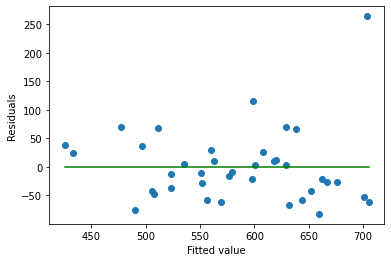

In [187]:
y_pred=model.fit().predict(X_endog)
plt.scatter(y_pred,(y_train-y_pred))
sns.lineplot(y_pred,(y_train-y_pred).mean(),color='g')
plt.xlabel('Fitted value')
plt.ylabel('Residuals')

***
- Residuals are around the mean which represents homoscedacity of the dataset.
- Which also represents linear relationship between variables
***

### Distribution plot of Residuals

Text(0.5, 0, 'Residuals')

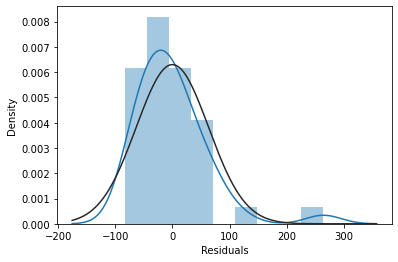

In [193]:
sns.distplot((y_train-y_pred),fit=norm)
plt.xlabel('Residuals')

***
- The residuals should be normally distributed. 
- Though, in practice, the distribution of errors, close to normal is acceptable.
***

### Normal Probability Plot (Q-Q plot)

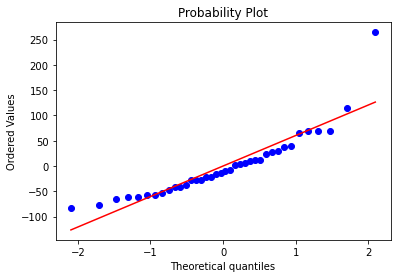

In [189]:
from scipy import stats
stats.probplot((y_train-y_pred),plot=plt)
plt.show()

***
- Plot of Theoretical values (Standard normal variates) on ordered value whose distribution is to be checked.
- If the points at the ends are falling on straight line it is said to be normally distributed.
- Here all the points aren't falling on lie and so its not perfectly normally distributed but in acceptable range.
***